Just a place to test whatever

In [1]:
import numpy as np
from astropy import units as u

kms = u.km/u.s
v0, v1, dv = (kms*x for x in (0, 50, 2.5))

In [2]:
varr = np.arange(*(v.to(dv.unit).to_value() for v in (v0, v1)), dv.to_value())*dv.unit

In [22]:
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
cube = SpectralCube.read("../m16_data/sofia/M16_CII_U.fits")
cube._unit = u.K

In [5]:
moments = []
for v_left in varr:
    v_right = v_left + dv
    moments.append(cube.spectral_slab(v_left, v_right).moment0().to(u.K*dv.unit))
print(len(moments))

20


[Text(1, 2.3124383412727525, '5'),
 Text(1, 3.9124227656412556, '25'),
 Text(1, 5.52147691747826, '125')]

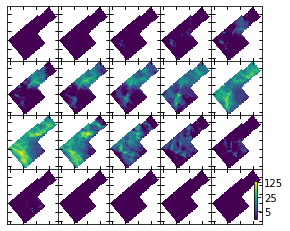

In [30]:
fig = plt.figure()
stretch = np.arcsinh
im, ax = None, None
for i in range(len(moments)):
    v_left, v_right = varr[i], varr[i]+2.5*kms
    mom0 = moments[i]
    ax = plt.subplot2grid((4, 5), (i//5, i%5), projection=mom0.wcs)
    im = ax.imshow(stretch(mom0.to_value()), vmin=stretch(2), vmax=stretch(150))
    for axis_name in ('x', 'y'):
        ax.tick_params(axis=axis_name, direction='in')
        ax.tick_params(axis=axis_name, labelbottom=False, labelleft=False)
dx = 0.205
plt.subplots_adjust(wspace=0, hspace=0, left=dx, right=1-dx)
#     ax.coords[0].set_format_unit(u.deg)
#     ax.coords[1].set_format_unit(u.deg)

insetcax = inset_axes(ax, width="5%", height="70%", loc='lower right')
ticks = [5, 25, 125]
cbar = fig.colorbar(im, cax=insetcax, orientation='vertical',
                    ticks=stretch(ticks))
insetcax.set_yticklabels([f"{x:d}" for x in ticks])